In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# use '%matplotlib widget' for interactive plot

import sys
import numpy as np

from shapely.affinity import translate
from shapely import unary_union

from zeroheliumkit import Anchor, SuperStructure
from zeroheliumkit import Square, Rectangle, Taper
from zeroheliumkit.src.plotting import *

plot_cfg = {"layer1": BLUE, "layer2": YELLOW2, "anchors": RED, "skeletone":CYAN, "open": GREEN, "air": GRAY}

<Axes: >

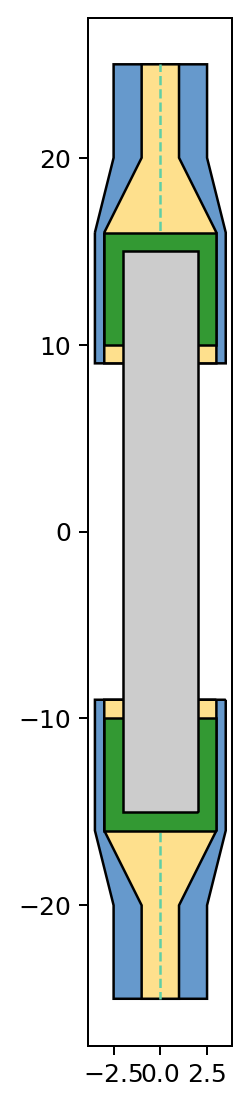

In [2]:
airb = {"w":4, "ol":2, "g":1, "l":30}

ab_opening = airb["w"] + airb["ol"]
ab_pad = ab_opening + airb["ol"]

ab = Taper(length = 4,
           layers = {"layer2": (6, 2), "layer1": (7, 5)},
           alabel=("a1", "a2"))
ab.get_anchor("a1").move(xoff=4)
ab.get_anchor("a2").move(xoff=-2)
ab.moveby_snap(anchor="a1", to_point=(0,0))
ab.add_layer("open", Square(ab_opening))
ab.add_layer("air", translate(Rectangle(airb["l"]/2, airb["w"]), (-airb["l"]/4 + airb["ol"])))
ab.rotate(90).moveby(xy=(0, airb["l"]/2 - airb["ol"]))
ab.mirror(aroundaxis="x", update_labels=True, keep_original=True)
ab.remove_anchor(["a1", "a1_m"])

# ab_main - for routing
ab_main = ab.copy()
ab_main.modify_anchor(label="a2", new_name="out")
ab_main.modify_anchor(label="a2_m", new_name="in", new_direction=90)
ab.remove_anchor(["a2", "a2_m"])

ab.quickplot(plot_cfg)

route between a6 and a7: bezier curve
route between a6 and 0in: fillet curve
route between 0out and 1in: bezier curve
route between 1out and a7: bezier curve


<Axes: >

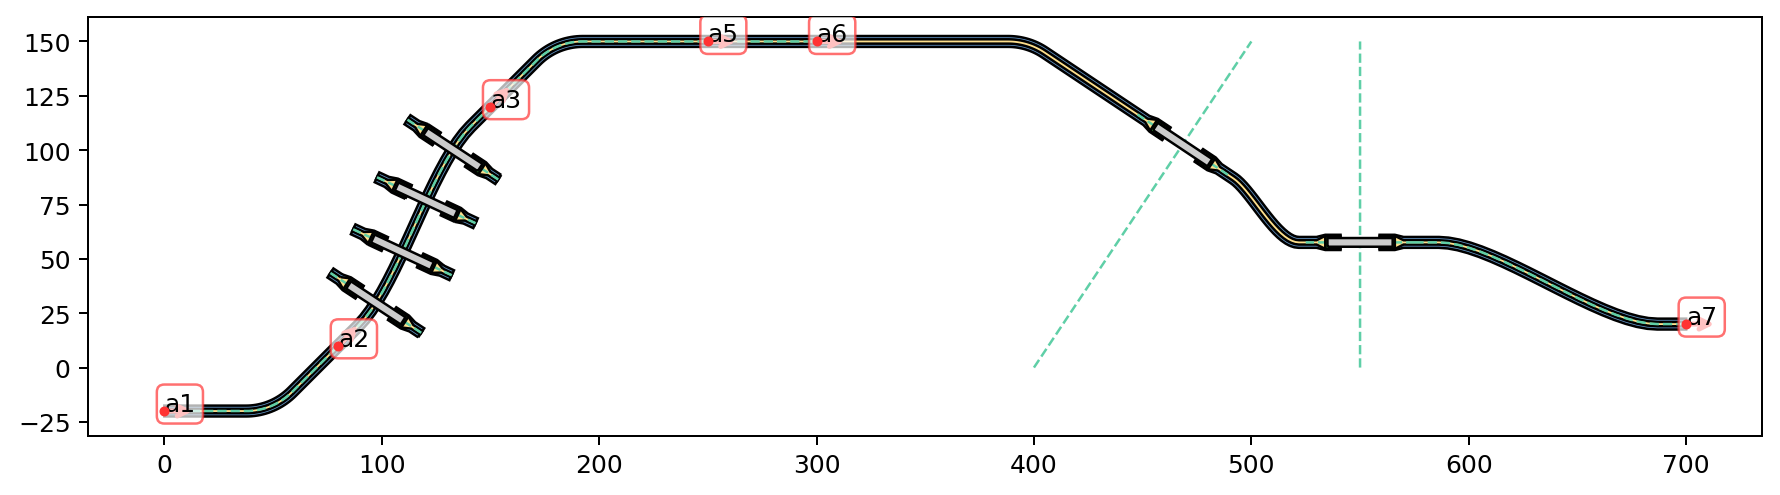

In [3]:
route_config = {"radius": 30, "num_segments": 20}

ss = SuperStructure(route_config)
ss.add_anchor([Anchor((0,-20), 0, "a1"),
               Anchor((80,10), 45, "a2"),
               Anchor((150,120), 45, "a3"),
               Anchor((250,150), 0, "a5"),
               Anchor((300,150), 00, "a6")])

ss.route(("a1", "a2", "a3"), layers={"layer2": 2, "layer1": 5}, new_feature=True)
ss.route(("a3", "a5", "a6"), layers={"layer2": 2, "layer1": 5}, new_feature=True)
#ss.scale(5, 5)

ss.add_along_skeletone(bound_anchors=("a2", "a3"), num=4, structure=ab)
ss.fix_line()
ss.skeletone = unary_union([ss.skeletone, 
                            LineString([(400, 0), (500, 150)]), 
                            LineString([(550, 0), (550, 150)])])

ss.add_anchor(Anchor((700, 20), 0, "a7"))

ss.route(("a6", "a7"), layers={"layer2": 2, "layer1": 5}, airbridge=ab_main, new_feature=True, print_status=True)

ss.quickplot(plot_cfg)

<Axes: >

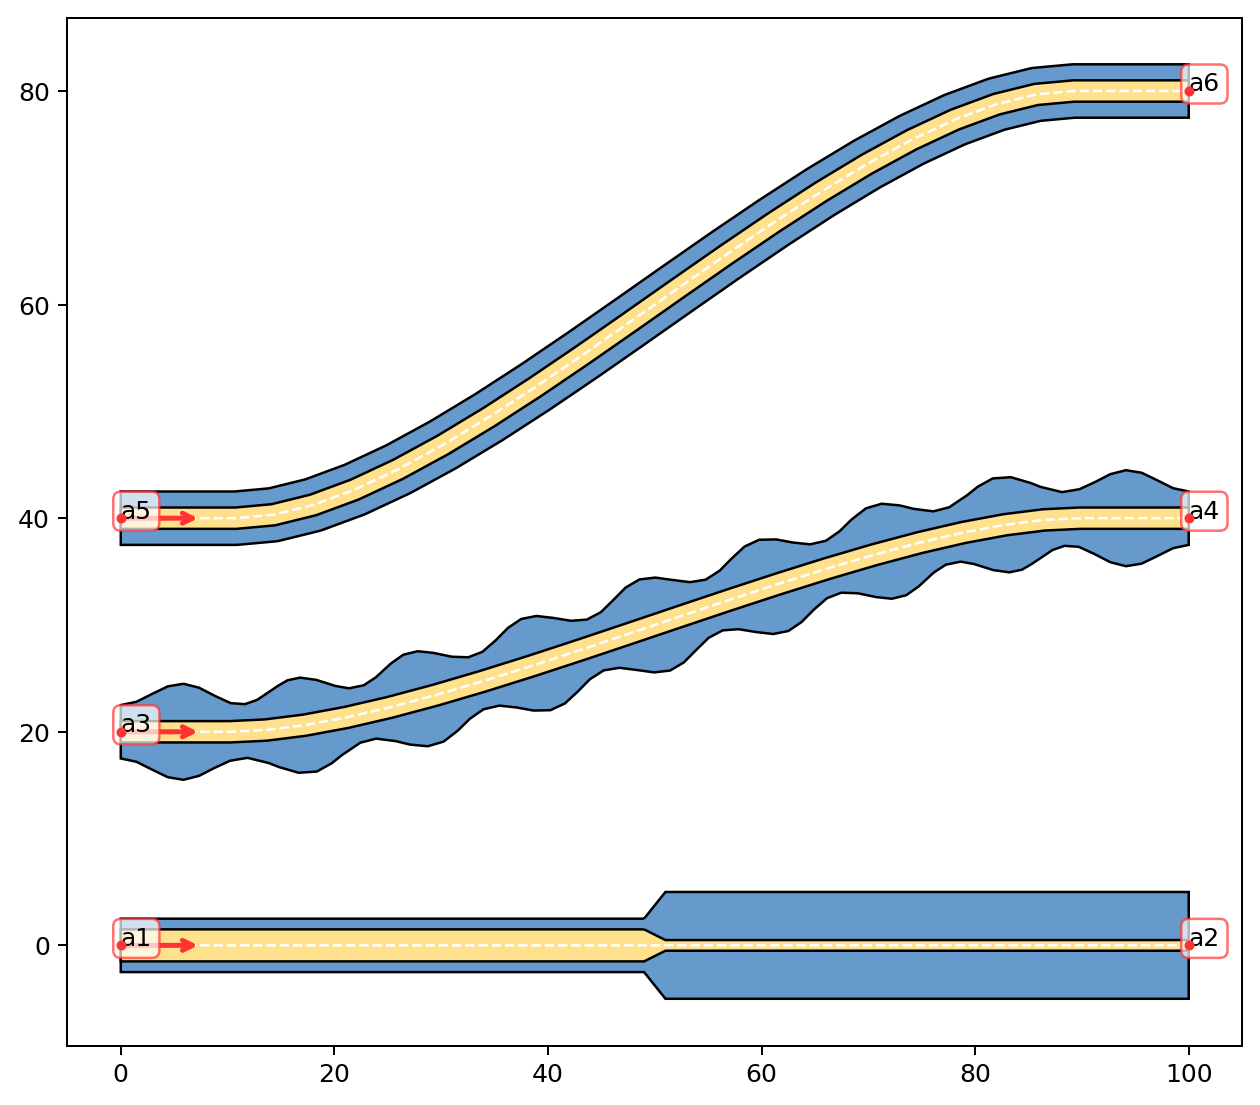

In [4]:
plot_cfg = {"gnd": BLUE, "top": YELLOW2, "anchors": RED, "skeletone": WHITE}
route_config = {"radius": 30, "num_segments": 20}

s = SuperStructure(route_config)
s.add_anchor([Anchor((0,0), 0, "a1"),
              Anchor((100,0), 0, "a2"),
              Anchor((0,20), 0, "a3"),
              Anchor((100,40), 0, "a4"),
              Anchor((0,40), 0, "a5"),
              Anchor((100,80), 0, "a6")])

s.route(("a5", "a6"), layers={"top": 2, "gnd": 5}, new_feature=True)
s.route(("a3", "a4"), layers={"top": 2, "gnd": 7 - 2*np.cos(18*np.pi*np.linspace(0,1,71))}, new_feature=True)         
s.route(("a1", "a2"), layers={"top": {"d": [0, 0.49, 0.51, 1], "w": [3, 3, 1, 1], "normalized": True},
                              "gnd": {"d": [0, 49, 51, 100], "w": [5, 5, 10, 10], "normalized": False}}, new_feature=True)

s.quickplot(plot_cfg)